In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

#  Assignment 1 - Advance Machine Learning 159.738 

---

### Team members:
Ziyi Wang ID 18042783
Youzhi Lei   19039281
Zhichun Wang 19024898

## Content
* Loading datasets and resize data split to training and testing
* For this part, we will use the CNN for the vehicles&animals dataset


---


#### Information about datasets
#### Labeled vehicles and animals from:
* Images of various types of vehicles and animals http://www.cs.toronto.edu/%7Ekriz/cifar.html

In [2]:
#!pip install opencv-python

In [3]:
#!pip install tensorflow

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import patsy
import os
#from plt import Image 
import cv2
%matplotlib inline

In [5]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.0-rc1


In [6]:
from pylab import rcParams

sns.set(style="ticks")
#sns.set_style("whitegrid")
rcParams['figure.dpi'] = 72
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'
rcParams['figure.figsize'] = 10,8
rcParams['font.size'] = 14
rcParams['axes.labelsize'] = 'large'
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14

pd.options.display.max_columns = 50

In [10]:
import os
cwd = os.getcwd()
print(cwd)
#Please put the data to current location, Thanks 
DATADIR = "../cifar-10-batches-py/"
DATADIR = os.path.join(cwd, DATADIR)

/home/dp1/Documents/fred/codes/machinelearning2019/cifar10


gray shape is  (32, 32)
10 categories: [b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck']


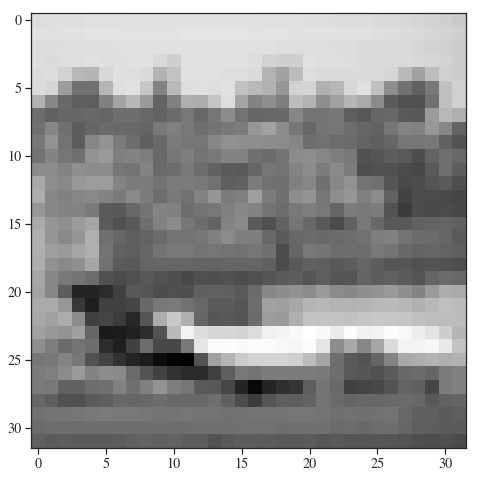

In [13]:
#load the dataset 
#test one image and show 
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

batch = unpickle(DATADIR+"data_batch_4")

IMG_SIZE = 32 # each image in the dataset is 32*32, color
img_array = batch[b'data'][0].reshape(3, 1024)

ziplist = list(zip(img_array[2], img_array[1], img_array[0]))
newarray = np.array(ziplist).reshape(IMG_SIZE, IMG_SIZE, 3)

plt.imshow(newarray)
plt.show
#print(newarray)
img_array = cv2.cvtColor(newarray, cv2.COLOR_BGR2GRAY)
print("gray shape is ", img_array.shape)
plt.imshow(img_array, cmap='gray')
plt.show

metafile = unpickle(DATADIR+"batches.meta") 

CATEGORIES = []
for i in range(len(metafile[b'label_names'])):
    CATEGORIES.append(metafile[b'label_names'][i])

print(len(metafile[b'label_names']), "categories:", CATEGORIES)


In [14]:
#show the print array
print(img_array)

[[178 178 178 ... 170 168 165]
 [180 179 180 ... 173 171 168]
 [177 177 178 ... 171 169 167]
 ...
 [108 110 111 ...  98  95  97]
 [105 106 106 ...  97  95  95]
 [ 98  95  97 ...  86  87  85]]


<function matplotlib.pyplot.show(*args, **kw)>

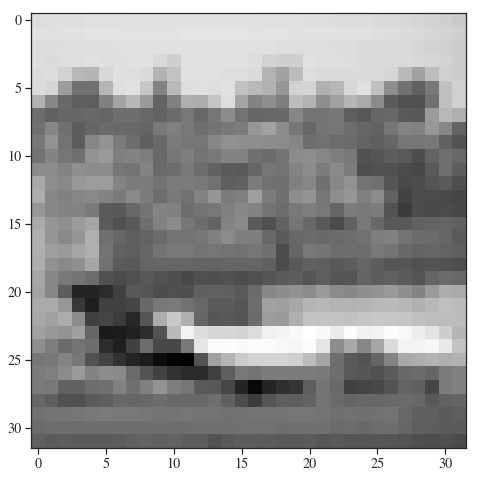

In [15]:
# set the image size to 50
IMG_SIZE = 32
new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show

In [17]:
import random

training_data = []
testing_data = []

def create_training_data():    
    for batchfile in os.listdir(DATADIR):
        try:
            if (batchfile.startswith("data_batch_") or batchfile == 'test_batch'):                
                batch = unpickle(os.path.join(DATADIR, batchfile))
                
                for i in range(len(batch[b'data'])): # There should be 10000 images in each batch                    
                    # 1024 red values, then 1024 green values, then 1024 blue values
                    img_array = batch[b'data'][i].reshape(3, 1024) 
                    #print("shape is", img_array.shape)
                    # Note that OpenCV needs BGR instead of RGB
                    ziplist = list(zip(img_array[2], img_array[1], img_array[0])) 
                    img_array = np.array(ziplist).reshape(IMG_SIZE, IMG_SIZE, 3)
                    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
                    if (batchfile.startswith("data_batch_")):
                        training_data.append([img_array, batch[b'labels'][i]])
                    else:
                        testing_data.append([img_array, batch[b'labels'][i]])
            

        except Exception as e:
            pass#pass the image if they broken    
    
create_training_data()


In [18]:
# get out and show the training data and testing data
print(len(training_data))
print(len(testing_data))


50000
10000


In [19]:
#seperate dataset
random.shuffle(training_data)
random.shuffle(testing_data)

In [20]:
print("labels of 10 training samples:")
for sample in training_data[:10]:
    print(sample[1])

print("\nlabels of 10 testing samples:")
for sample in testing_data[:10]:
    print(sample[1])

labels of 10 training samples:
6
1
2
0
8
8
4
5
1
2

labels of 10 testing samples:
5
0
8
3
1
8
9
4
4
2


In [21]:
#featurs set
trainfeaturex = []
#label
trainlabely = []
#featurs set
testfeaturex = []
#label
testlabely = []

In [22]:
for features, label in training_data:
    trainfeaturex.append(features)
    trainlabely.append(label)
#conver numpy array in CNN network, -1 means how many featurs do we have and 1 means grey image
trainfeaturex = np.array(trainfeaturex).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [23]:
for features, label in testing_data:
    testfeaturex.append(features)
    testlabely.append(label)
#conver numpy array in CNN network, -1 means how many featurs do we have and 1 means grey image
testfeaturex = np.array(testfeaturex).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [24]:
import pickle

pickle_out = open("trainfeaturex.pickle", "wb")
pickle.dump(trainfeaturex, pickle_out)
pickle_out.close()

pickle_out = open("trainlabely.pickle", "wb")
pickle.dump(trainlabely, pickle_out)
pickle_out.close()

pickle_in = open("trainfeaturex.pickle", "rb")
trainfeaturex = pickle.load(pickle_in)
pickle_in.close()

In [25]:
#pickle for testr 
pickle_out = open("testfeaturex.pickle", "wb")
pickle.dump(testfeaturex, pickle_out)
pickle_out.close()

pickle_out = open("testlabely.pickle", "wb")
pickle.dump(testlabely, pickle_out)
pickle_out.close()

#test 
pickle_in = open("testfeaturex.pickle", "rb")
testfeaturex = pickle.load(pickle_in)
pickle_in.close()

In [26]:
trainfeaturex[1]

array([[[208],
        [217],
        [210],
        ...,
        [254],
        [255],
        [254]],

       [[149],
        [168],
        [167],
        ...,
        [253],
        [252],
        [253]],

       [[212],
        [204],
        [208],
        ...,
        [235],
        [236],
        [235]],

       ...,

       [[254],
        [254],
        [251],
        ...,
        [253],
        [253],
        [253]],

       [[255],
        [254],
        [254],
        ...,
        [252],
        [254],
        [254]],

       [[254],
        [254],
        [254],
        ...,
        [250],
        [252],
        [253]]], dtype=uint8)

In [27]:
trainfeaturex = trainfeaturex/255
trainfeaturex.shape

(50000, 32, 32, 1)

In [28]:
testfeaturex1 = testfeaturex/255
testfeaturex.shape


(10000, 32, 32, 1)

Now we can do CNN model training

### CNN Network

In [29]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape = trainfeaturex.shape[1:]))
# batchnormalization
# model.add(BatchNormalization(axis=bn_axis, name='bn_conv1'))

model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))


model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(CATEGORIES), activation='softmax'))



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Using TensorFlow backend.


In [30]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [32]:
%%time
history = model.fit(trainfeaturex, trainlabely, epochs=10, validation_split=0.33, batch_size=10, verbose=0)

CPU times: user 26min 2s, sys: 34.9 s, total: 26min 37s
Wall time: 3min 32s


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


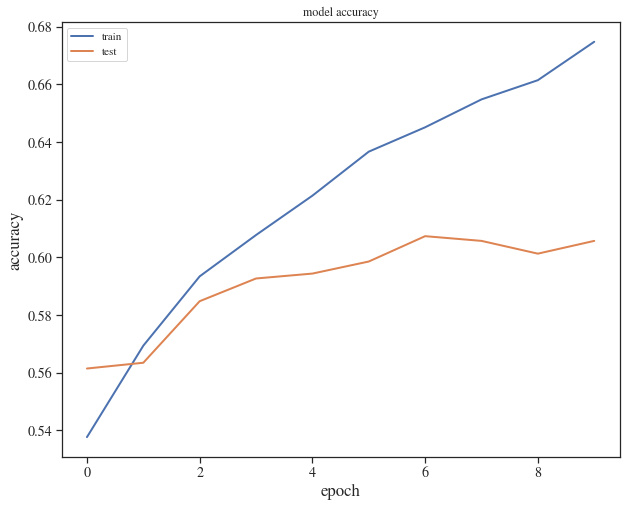

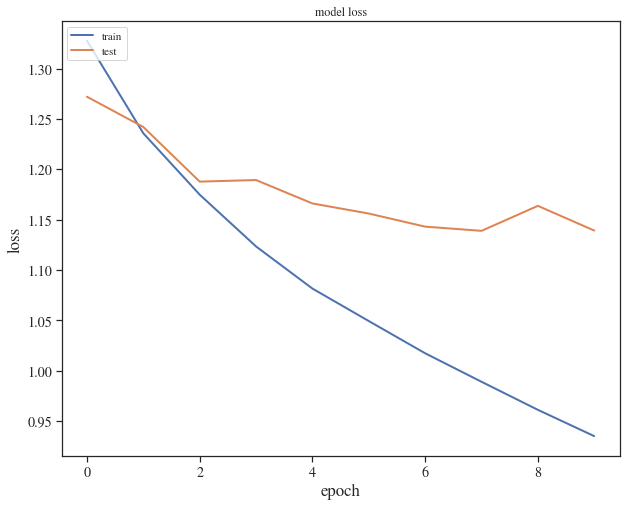

In [33]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        640       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

In [35]:
test_loss, test_acc = model.evaluate(testfeaturex1, testlabely)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 62us/step
Test accuracy: 0.6001


In [36]:
predictions = model.predict(testfeaturex1)

In [37]:
predictions[100]

array([0.05074212, 0.1350171 , 0.00387851, 0.03423269, 0.00292979,
       0.00117015, 0.03690826, 0.00268059, 0.05197668, 0.68046415],
      dtype=float32)